**Name: Christ-Brian Amedjonekou**  
**Date: 3/17/2019**  
**MAT 4880-D692 (Math Modeling II) Whale, Astronaut Problem HW revisited**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

## Chapter 5.3 Phase Portraits

* Phase Portraits combine the earlier vector plot (a graphical unit) with the eigenvalue method to create a graphical description of the dynamics over the entire state space. The are important in the analysis of nonlinear dynamical systems because in most cases perfect analytical solutions are hard to come by. 

### Electrical Circuit Example

#### Variables

$v_C = \text{Voltage across Capacitor}$  
$i_C = \text{current through Capacitor}$  
$v_R = \text{Voltage across resistor}$  
$i_R = \text{current through resistor}$  
$v_L = \text{Voltage across inductor}$  
$i_L = \text{current through inductor}$  

#### Assumptions

$C \frac{dv_C}{dt} = i_C $  

$v_R = f(i_R)$  

$L \frac{di_L}{dt} = v_L $  

$i_R = i_L = i_C$  
$v_R + v_L + v_C = 0$  
$L = 1$  
$C = \frac{1}{3}$  
$f(x) = x^3+ 4x$

#### Objective

Determine the behavior of all six variables over time

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import scipy.linalg as sci

### Functions

In [19]:
def g(x,t):
    X1 = x[0]
    X2 = x[1]
    G1 = g1(X1,X2)
    G2 = g2(X1,X2)
    return [G1,G2]


def phasePortrait(pts,xR,yR,g1,g2):

    myList = []

    for point in pts:

        # initial conditions
        x0 = point
        t  = np.linspace(0, 100, 5000)

        # numerical solution
        soln = odeint(g, x0, t)
        X1 = soln[:, 0]
        X2 = soln[:, 1]
        myList.append([(a,b) for a,b in zip(X1,X2) if xR[0]<= a <= xR[1] and yR[0]<= b <= yR[1]])

    P = Graphics()

    for L in myList:
        P+= list_plot(L)

    P += plot_vector_field((g1,g2),(x1,xR[0],xR[1]),(x2,yR[0],yR[1]))

    show(P)

### Example

$$\frac{dx_1}{dt} = x_1 - x_2$$  
$$\frac{dx_2}{dt} = x_1 + x_1 * x_2$$  

### Variables

In [2]:
# Writing the Model for the deer population
x1, x2 = sp.symbols('x1 x2')
#dPdt = sp.Function('dPdt')

# init_session() displays LaTeX version of outputs; 'quiet= True' stops 
# init_session from printing messages regarding its status
sp.init_printing()

### Sympy Rendition

In [3]:
# Output
dx1dt = x1 - x2
dx2dt = x1 + x1 * x2
(dx1dt, dx2dt)

### Equilibrium Points

***(a) The equilibrium points to the Blue Whale Population are shown below. They occur when $\frac{dF}{dt} = \frac{dB}{dt} = 0$***

In [4]:
# Solution to the model(Equilibrium Point)

equilibrium_points = solve([dx1dt, dx2dt], x1, x2)
print('Equilibrium Points: {} and {}'.format(equilibrium_points[0], equilibrium_points[1]))

Equilibrium Points: (-1, -1) and (0, 0)


**Null Clines**

In [5]:
(solve([dx1dt], x1),solve([dx1dt], x2),solve([dx2dt], x1),solve([dx2dt], x2))

### Lambda Functions

In [6]:
dx1_dt = lambda x1_, x2_: x1_ - x2_
dx2_dt = lambda x1_, x2_: x1_ + x1_ * x2_

### Plotting Vector Field

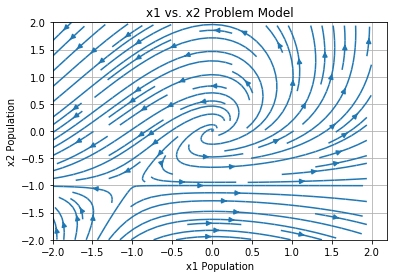

In [7]:
%matplotlib inline
#----------------------------------------------------------------------------------
# Creates the superimposed plot for stream plot of the model, as well as dPdt = 0
#----------------------------------------------------------------------------------

# Part 1: Creates the length of the 'X' (Days) and 'Y'(Deer Population) Axis 
x, y = np.linspace(-2, 2), np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)

# Part 2: The approximated points of the function dP/dt which we'll use for the plot.
U, V = dx1_dt(X, Y), dx2_dt(X, Y)

# Part 3: Creating the figure for the plot
fig, ax1 = plt.subplots()

# Part 4: Creating the plots for dP/dt = 0, the Nullclines

#ax1.plot([0,9000000],[0,0], 'r-', lw=2, label='Fin Whale-Nullcline')
#ax1.plot([0,9000000],[5000000,5000000], 'r-', lw=2)
#ax1.plot([0,0],[6500000,0], 'b-', lw=2, label='Blue Whale-Nullcline')
#ax1.plot([8000000,8000000],[6500000,0], 'b-', lw=2)

# Part 5: Sets the axis, and equilibrium information for the plot
ax1.set(title= 'x1 vs. x2 Problem Model', xlabel= 'x1 Population', 
        ylabel ='x2 Population')
ax1.tick_params(axis='x1 Population', labelcolor='r')
#ax1.legend(loc= 'upper left')

# Part 6: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)
ax1.grid()

### Jacobian Matrix

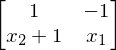

In [8]:
A_matrix = sp.Array([[sp.diff(dx1dt, x1), sp.diff(dx1dt, x2)], [sp.diff(dx2dt, x1), sp.diff(dx2dt, x2)]])
A_matrix

### Setting up the Matrix

In [9]:
solMatrix1 = np.array([[float(sp.diff(dx1dt, x1).subs({x1:0, x2:0})), 
                        float(sp.diff(dx1dt, x2).subs({x1:0, x2:0}))], 
                       [float(sp.diff(dx2dt, x1).subs({x1:0, x2:0})), 
                        float(sp.diff(dx2dt, x2).subs({x1:0, x2:0}))]])

solMatrix2 = np.array([[float(sp.diff(dx1dt, x1).subs({x1:-1, x2:-1})), 
                        float(sp.diff(dx1dt, x2).subs({x1:-1, x2:-1}))], 
                       [float(sp.diff(dx2dt, x1).subs({x1:-1, x2:-1})), 
                        float(sp.diff(dx2dt, x2).subs({x1:-1, x2:-1}))]])

solMatrix1

array([[ 1., -1.],
       [ 1.,  0.]])

In [10]:
solMatrix2

array([[ 1., -1.],
       [ 0., -1.]])

### Eigenvalues

In [14]:
eigenvalues1, eigenvectors1 = sci.eig(solMatrix1)
eigenvalues2, eigenvectors2 = sci.eig(solMatrix2)

**For $(x_1 = 0, x_2 = 0)$, both eigenvalues have positive real parts which make it unstable.**

In [15]:
eigenvalues1

array([0.5+0.8660254j, 0.5-0.8660254j])

**For $(x_1 = -1, x_2 = -1)$, one of the eigenvalues have a positive real part which makes it unstable.**

In [16]:
eigenvalues2

array([ 1.+0.j, -1.+0.j])

### Eigenvectors

**For $(x_1 = 0, x_2 = 0)$.**

In [17]:
eigenvectors1

array([[0.35355339+0.61237244j, 0.35355339-0.61237244j],
       [0.70710678+0.j        , 0.70710678-0.j        ]])

**For $(x_1 = -1, x_2 = -1)$.**

In [18]:
eigenvectors2

array([[1.        , 0.4472136 ],
       [0.        , 0.89442719]])